# Lab 5: Laboratory Notes - Week 5: Data Visualisation

## Visualisation

The Jupyter Notebook environment is unlike a normal software application development environment.  It works on cells and standard output is directed to the notebook.  However, graphical output in a computing environment can be set up to be delivered to a file or a screen (or directly to other devices such as a printer).  In our environment, we want to make sure that the visualisation output (graphs) are shown within (the term we use is "inline") our notebook.  Hence we add a "magic line" in our notebook.  In this case, we inform the notebook that we want the output from the library that we use to display it within our notebook.

<span style="color:red">%matplotlib inline</span>

In order to plot data in Python in this course, we use the '<span style="color:red">matplotlib</span>' library.  Do note that the current popular visualisation library is the <span style="color:red">seaborn</span> library.  Hence to start our visualisation, we use:

<span style="color:red">%matplotlib inline  
import matplotlib.pyplot as plt</span>

Or more often than not, you will see

<span style="color:red">from matplotlib import pyplot as plt</span>

## Basic Plots

We will continue to use the titanic dataset and, on your Canvas, you should have the <span style="color:red">titatic.csv</span> file in the Week 5 materials.

<span style="color:red">import pandas as pd  
titanic = pd.read_csv('titanic.csv')</span>

We will usually do data auditing on the data that we have read.  Let's start our visualisation by calling the '<span style="color:red">plot()</span>' function to have a look at the data:

<span style="color:red">plt.plot(titanic.Fare)  
plt.show()</span>

The figure looks a little complicated, but it is just plotting the fare for each passenger.  From this plot, are you able to know the total number of passengers?  The answer is probably no, as visualisation is not usually about providing you the exact value.

## Histogram

More informative in this case would be to look at the distribution over fares. We can visualise the distribution by plotting a histogram.

<span style="color:red">titanic.Fare.hist(bins = 200) # try different numbers of bins  
plt.xlim(0,300)               # setting limit on x-axis  
plt.ylim(0,300)               # setting limit on y-axis</span>

#### Exercise 5.1:

Reduce the x-axis limit to see how much most people paid to go on the titanic. Approximately how many people paid 10 or less?  You should get a graph that looks similar (not the same) as below.

![P1](picture/P1.png)

## Boxplot

Alternatively, we can use a boxplot (also called a box and whisker diagram) to visualise the same data. A boxplot is a simple visual representation of key features of a univariate sample. It displays five-point summaries and potential outliers in graphical form. To create a boxplot we call:

<span style="color:red">titanic.boxplot(column = 'Fare')  
plt.ylim(0, 600) # setting limit on y-axis</span>

The green (maybe other colours depending on your setup) line across the centre of the box indicates the median value, i.e. half the data lies below the green line and half lies above it. The box itself defines the quartiles -- one quarter of the data lies above the box, and another quarter below it.

![P2](picture/P2.png)

We can see many high 'Fare' values to the top of the graph. One might assume they are outliers, but it probably makes more sense to first investigate the different classes. We can generate boxplots divided by class, as follows:

<span style="color:red">titanic.boxplot(column = 'Fare', by = 'Pclass')  
plt.ylim(0, 600)</span>

![P3](picture/P3.png)

If we wanted to, we could filter out the large values in the different classes. For example, we could filter out values greater than 160 in first class and set the limit to 200 for the y-axis:

<span style="color:red">filt = ~((titanic['Pclass'] == 1) & (titanic['Fare'] > 160))  
titanic = titanic[filt]  
titanic.boxplot(column = 'Fare', by = 'Pclass')  
plt.ylim(0, 200)</span>

![P4](picture/P4.png)

#### Exercise 5.2: 

Use the same technique to filter out values greater than 50 for the second class and 30 for the third class. Plot the boxplot, and observe the graph. What is the median price for each class? Hint: set a lower y-axis limit to see more clearly.

Since this is a session that is to be done on your own, you should get the median of the 3rd class to be very close to the 1st quartile (25th percentile).

<span style="color:red">filt = (titanic['Pclass'] == 3)  
titanic = titanic[filt]  
titanic.boxplot(column = 'Fare', by = 'Pclass')  
plt.ylim(0, 10)</span>

![P5](picture/P5.png)

## Bar Chart

We can compare the fare for different classes and for children/adults using a bar chart.  Let's attempt to compare the number of children (those age under 18) and adults (age 18 or over) for the different classes.  We first need to create two functions to filter based on age groups.  In Python, we can create functions.  This may be new to you if you didn't explore this in the Week 3 laboratory.

<span style="color:red">def child_count(x):  
    return sum(e<18 for e in x)</span>

<span style="color:red">def adult_count(x):  
    return sum(e>=18 for e in x)</span>

Once we have defined our functions, we can do the aggregation that we want.

<span style="color:red">groupbyClass2 = titanic.groupby('Pclass').agg({'Age':[child_count, adult_count]})  
groupbyClass2</span>

You should get an output like below.

![P6](picture/P6.png)

This would need us to do the same like what we did in our aggregation laboratory in Week 3 where we reset the index and then drop the header level to 0.

<span style="color:red">groupbyClass2 = groupbyClass2.reset_index()  
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)  
groupbyClass2.rename(columns = {'':'class'},inplace = True)  
groupbyClass2</span>

This should result in a groupbyClass2 DataFrame that's neat and tidy for us to proceed.

![P7](picture/P7.png)

We can then plot the bar graph to visualise it.

<span style="color:red">ax=groupbyClass2.plot.bar(figsize=(8,5))  
ax.set_xticklabels(groupbyClass2['class'],rotation=45)  
plt.xlabel('Ticket Class')  
plt.ylabel('Number of Passengers(child or adult)')  
plt.title('Passengers ticket class based on their adulthood')</span>

This should result in a not too ideal bar chart.  What's wrong with the bar chart it produced?

![P8](picture/P8.png)

Which passenger class do you think had the most families?

## Pie Chart

For a pie chart exercise, we use the same groupbyClass2 DataFrame to show the number of children in each passenger class.  This is by using the 'child_count' column.

<span style="color:red">plt.pie(groupbyClass2['child count'])
plt.show()</span>

This should result in a pie chart that looks like:

![P9](picture/P9.png)

This pie chart looks rather bare and is not very informative.  You can refer to the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html) and maybe add a few annotations.  Let's create a fancier pie chart after reading the documentation and samples.

<span style="color:red">labels = 'First', 'Second', 'Third'  
explode = (0, 0.1, 0)  # only "explode" 2nd class  
fig1, ax1 = plt.subplots()  
ax1.pie(groupbyClass2['child count'], explode=explode, labels=labels, autopct='%1.1f%%' shadow=True, startangle=90)  
ax1.axis('equal')  
plt.show()</span>

This should produce a more interesting pie chart.

![P10](picture/P10.png)

In what situation should we use a Pie chart?  Refer back to your lecture.

## Scatter Plot

We have seen scatter plots in our previous weeks, especially for the correlation plots.  Let's create our own DataFrame.

Input a simple data frame.

<span style="color:red">df = pd.DataFrame({</span>  
    <p style="margin-left: 40px;"><span style="color:red">'Name' : ['Mike','Aaron','Brad','Steve','George',</p> <p style="margin-left: 40px;"><span style="color:red">'Mitchell','Shaun','Glenn','Pat','Robert','David'],</span></p>
    <p style="margin-left: 40px;"><span style="color:red">'Age' : [39,28,44,25,32,33,31,26,22,25,28],</span></p>
    <p style="margin-left: 40px;"><span style="color:red">'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]</span></p>
<span style="color:red">})  
df</span>

Let's have a quick look at the data by plotting it using an x-y scatter plot:

<span style="color:red">plt.scatter(df['Age'], df['Runs'])  
plt.show()</span>

We now have two views of the same data, the table (DataFrame) view and the plot. What information do you gain/lose in these different views? When should we use a scatter plot?

## More Examples

Let's refer back to our patients.txt file from last week.  Read the file again:

<span style="color:red">df = pd.read_fwf('patients.txt', widths=[3,1,10,3,3,3,3,1], header=None)</span>

Rename the columns (from exercise 4.2).

<span style="color:red">df.columns = ['ID','Gender','Visit','HR','SBP','DBP','DX','AE']</span>

#### Exercise 5.3:

Plot a scatter plot of Heart Rate (HR) against Systolic Blood Pressure (SBP) using matplotlib.

When you look at the plot, you should see a point on the top right-hand side of the graph that looks suspicious.  This is the benefit of visualising it as opposed to what we did last week.  From visualising it, we can see what's unusual instead of needing to look at the numbers themselves.  Hence, from visualising we know that we need to investigate this further and check the values.  To be clear, we should label our axes.

#### Exercise 5.4:

Label the axes for HR and SBP as “Heart Rate (HR)” and “Systolic Blood Pressure (SBP)”.  You should get a graph that looks like:

![P11](picture/P11.png)

A 2-dimensional plot would normally mean a comparison between 2 variables.  However, we can use other means, such as colour to help us visualize more.  If we wanted to see more information on the same plot, we could use a third column to colour the dots by modifying the call to "scatter" above:

<span style="color:red">plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='copper')</span>

You should get a plot now that looks like:

![P12](picture/P12.png)

We use <span style="color:red">cmap</span> as a colour map, and to get a list of available colour maps, you can list them out.

<span style="color:red">plt.colormaps()</span>

#### Exercise 5.5: 

In last week's laboratory, we also removed some of the outliers.  Once you have removed them, plot out the data again to see if it's in better shape.  The power of visualisation is to "just look"!

Have fun completing your Coursework 1.  Do remember that Week 6 is NOT a break and we will have laboratory sessions for consultation and also to review some common mistakes made in using Jupyter Notebook.

## My code part

#### Basic Plots

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import pandas as pd

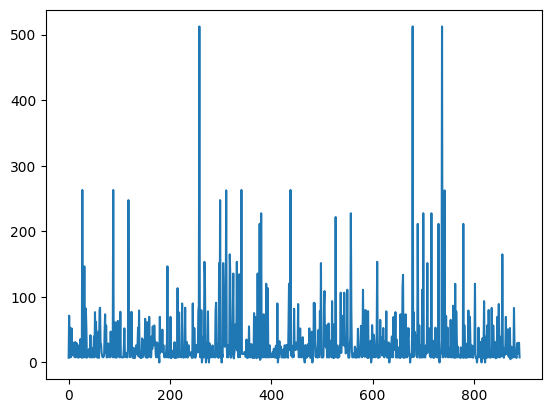

In [ ]:
# Create a histogram to plot the distribution of fares paid by passengers.
titanic = pd.read_csv('data/titanic.csv')
plt.plot(titanic.Fare)
plt.show()

#### Histogram

(0.0, 300.0)

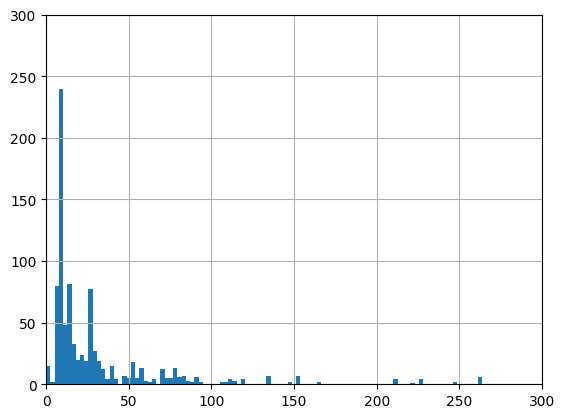

In [93]:
titanic.Fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300)               # setting limit on x-axis
plt.ylim(0,300)               # setting limit on y-axis

#### Exercise 5.1: 

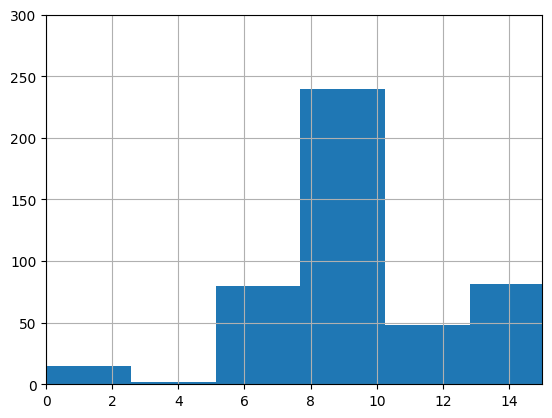

In [94]:
titanic.Fare.hist(bins=200)
plt.xlim(0, 15)  # Reducing the x-axis limit to focus on the lower fare range
plt.ylim(0, 300)
plt.show()

#### Boxplot

(0.0, 600.0)

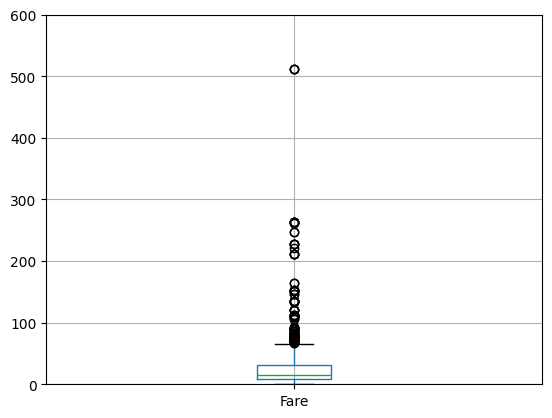

In [95]:
titanic.boxplot(column = 'Fare')
plt.ylim(0, 600) # setting limit on y-axis

(0.0, 600.0)

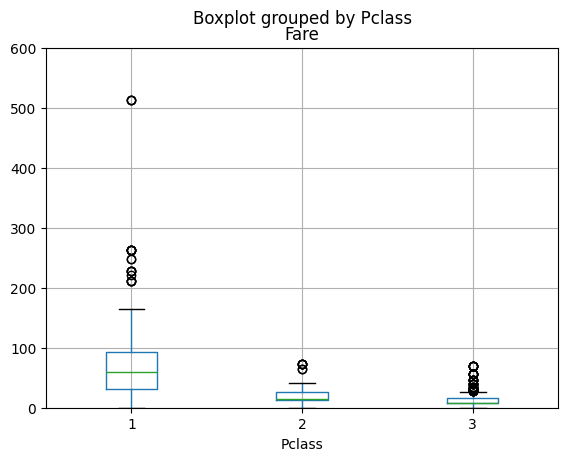

In [96]:
titanic.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 600)

(0.0, 200.0)

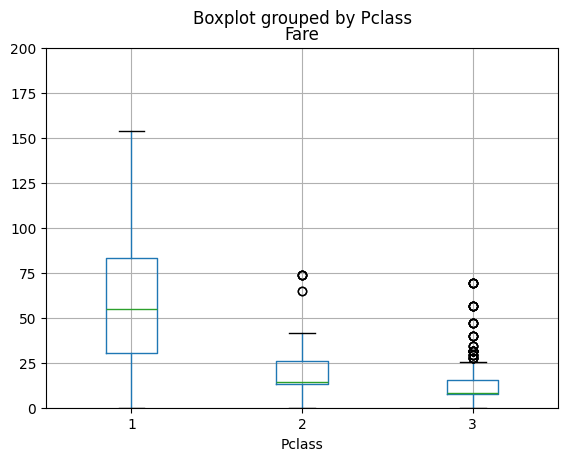

In [97]:
filt = ~((titanic['Pclass'] == 1) & (titanic['Fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 200)

#### Exercise 5.2: 

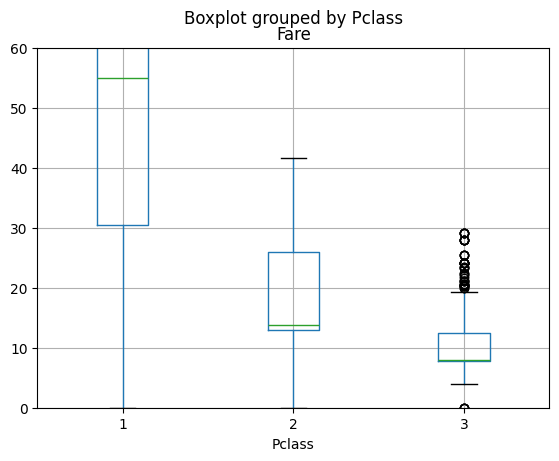

Median Fare for 1st Class: 55.0
Median Fare for 2nd Class: 13.7917
Median Fare for 3rd Class: 7.925


In [98]:
# Filter out values greater than 50 for Pclass 2 and greater than 30 for Pclass 3
filt = ~((titanic['Pclass'] == 2) & (titanic['Fare'] > 50) | (titanic['Pclass'] == 3) & (titanic['Fare'] > 30))
titanic = titanic[filt]

# Plot the boxplot
titanic.boxplot(column='Fare', by='Pclass')
plt.ylim(0, 60)  # Adjust y-axis limit for better visualization
plt.show()

# Calculate the median for each Pclass
median_1st_class = titanic[titanic['Pclass'] == 1]['Fare'].median()
median_2nd_class = titanic[titanic['Pclass'] == 2]['Fare'].median()
median_3rd_class = titanic[titanic['Pclass'] == 3]['Fare'].median()

print(f"Median Fare for 1st Class: {median_1st_class}")
print(f"Median Fare for 2nd Class: {median_2nd_class}")
print(f"Median Fare for 3rd Class: {median_3rd_class}")


(0.0, 10.0)

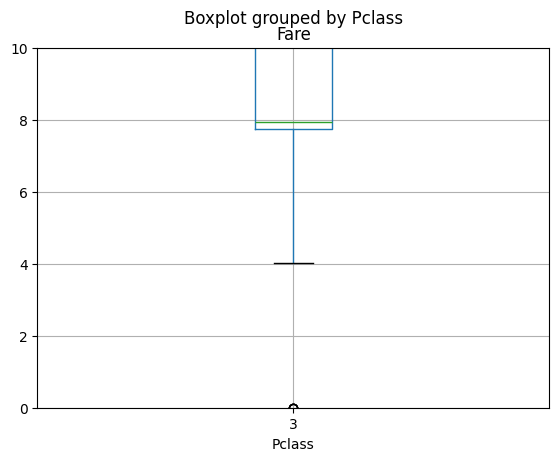

In [99]:
filt = (titanic['Pclass'] == 3)
titanic = titanic[filt]
titanic.boxplot(column = 'Fare', by = 'Pclass')
plt.ylim(0, 10)

#### Bar Chart

In [100]:
titanic = pd.read_csv('data/titanic.csv')

def child_count(x):
    return sum(e<18 for e in x)

def adult_count(x):
    return sum(e>=18 for e in x)

groupbyClass2 = titanic.groupby('Pclass').agg({'Age':[child_count, adult_count]})
groupbyClass2

Age            
       child_count adult_count
Pclass                        
1               12         174
2               23         150
3               78         277

In [101]:
groupbyClass2 = groupbyClass2.reset_index()
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2.rename(columns = {'':'class'},inplace = True)
groupbyClass2

,class,child_count,adult_count
0,1,12,174
1,2,23,150
2,3,78,277


Text(0.5, 1.0, 'Passengers ticket class based on their adulthood')

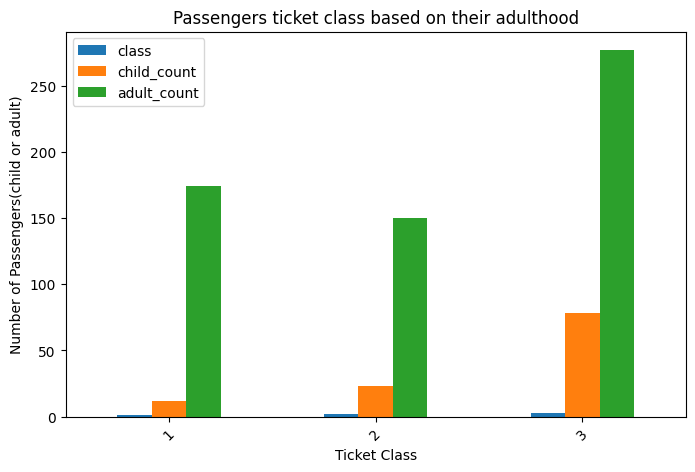

In [102]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
ax.set_xticklabels(groupbyClass2['class'],rotation=45)
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passengers(child or adult)')
plt.title('Passengers ticket class based on their adulthood')

#### Pie Chart

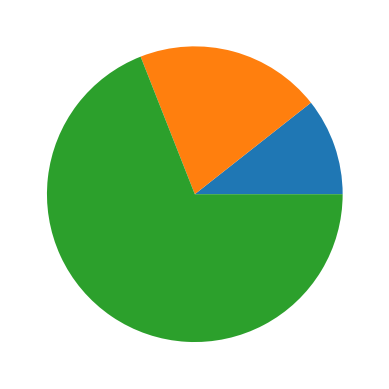

In [103]:
plt.pie(groupbyClass2['child_count'])
plt.show()

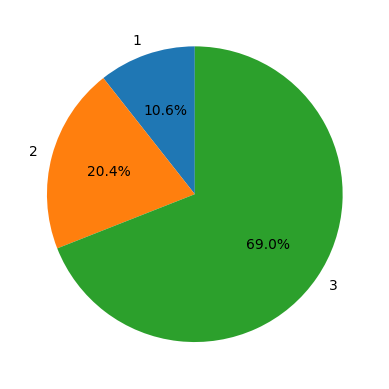

In [112]:
plt.pie(groupbyClass2['child_count'], labels = groupbyClass2['class'], autopct='%1.1f%%', startangle=90)
plt.show()

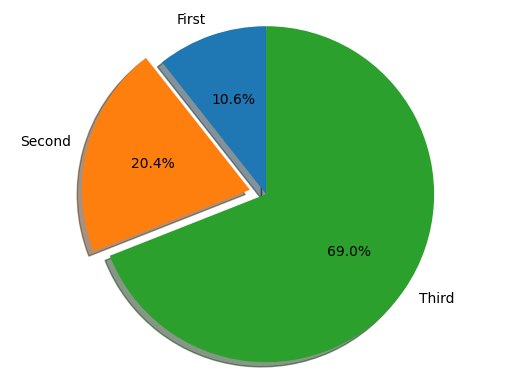

In [104]:
labels = 'First', 'Second', 'Third'
explode = (0, 0.1, 0)  # only "explode" 2nd class
fig1, ax1 = plt.subplots()
ax1.pie(groupbyClass2['child_count'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#### Scatter Plot

In [105]:
df = pd.DataFrame({
    'Name' : ['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pat','Robert','David'],
    'Age' : [39,28,44,25,32,33,31,26,22,25,28],
    'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]
})
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pat,22,557
9,Robert,25,1030


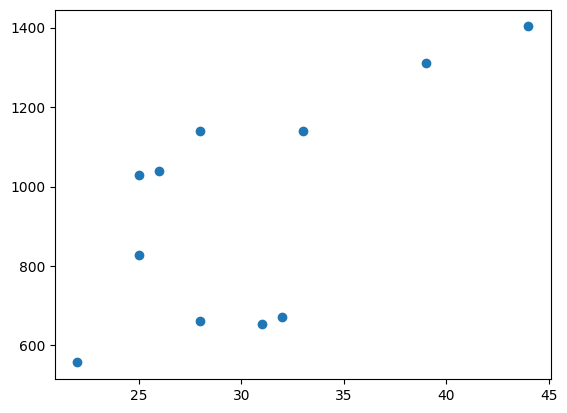

In [106]:
plt.scatter(df['Age'], df['Runs'])
plt.show()

#### More Examples

In [107]:
df = pd.read_fwf('data/patients.txt', widths=[3,1,10,3,3,3,3,1], header=None)
df.columns = ['ID','Gender','Visit','HR','SBP','DBP','DX','AE']

#### Exercise 5.3:

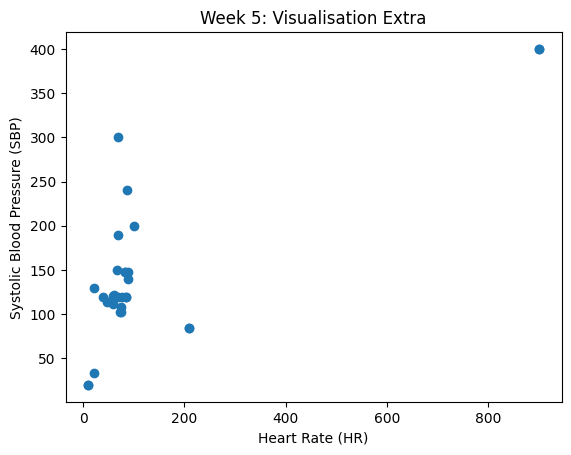

In [108]:
# Scatter plot
plt.scatter(df['HR'], df['SBP'])
# Add labels and title
plt.xlabel('Heart Rate (HR)')  # Label for x-axis
plt.ylabel('Systolic Blood Pressure (SBP)')  # Label for y-axis
plt.title('Week 5: Visualisation Extra')  # Title of the plot
# Show the plot
plt.show()

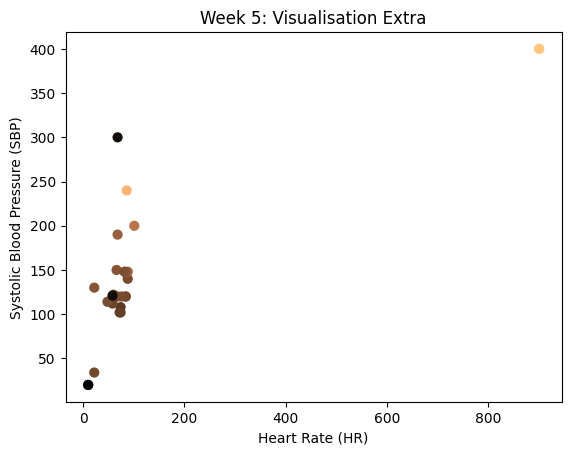

In [109]:
#plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='copper')

# Scatter plot
plt.scatter(df['HR'],df['SBP'], c=df['DBP'], s=40, cmap='copper')
# Add labels and title
plt.xlabel('Heart Rate (HR)')  # Label for x-axis
plt.ylabel('Systolic Blood Pressure (SBP)')  # Label for y-axis
plt.title('Week 5: Visualisation Extra')  # Title of the plot
# Show the plot
plt.show()

In [110]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

#### Exercise 5.5:

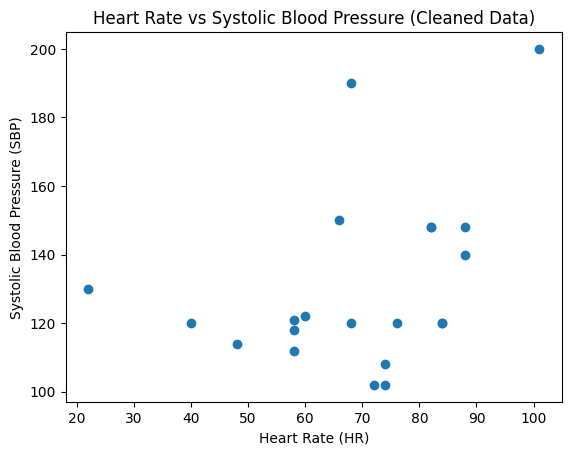

In [111]:
import numpy as np

# Calculate the IQR (Interquartile Range) for HR and SBP
Q1_HR = df['HR'].quantile(0.25)
Q3_HR = df['HR'].quantile(0.75)
IQR_HR = Q3_HR - Q1_HR

Q1_SBP = df['SBP'].quantile(0.25)
Q3_SBP = df['SBP'].quantile(0.75)
IQR_SBP = Q3_SBP - Q1_SBP

# Define the outlier range for both HR and SBP
lower_bound_HR = Q1_HR - 1.5 * IQR_HR
upper_bound_HR = Q3_HR + 1.5 * IQR_HR

lower_bound_SBP = Q1_SBP - 1.5 * IQR_SBP
upper_bound_SBP = Q3_SBP + 1.5 * IQR_SBP

# Remove the outliers from the dataset
filtered_df = df[(df['HR'] >= lower_bound_HR) & (df['HR'] <= upper_bound_HR) &
                 (df['SBP'] >= lower_bound_SBP) & (df['SBP'] <= upper_bound_SBP)]

# Scatter plot of cleaned data
plt.scatter(filtered_df['HR'], filtered_df['SBP'])
plt.xlabel('Heart Rate (HR)')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.title('Heart Rate vs Systolic Blood Pressure (Cleaned Data)')
plt.show()
